In [1]:


import pandas as pd

In [2]:
wiki_sci_parquets = "/home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences"
out_dir = "/home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences_index"

In [6]:
import os 
import faiss
import numpy as np
from tqdm import tqdm

# build index from --wiki-sci-parquets directory
parquet_files = [os.path.join(wiki_sci_parquets, f) for f in os.listdir(wiki_sci_parquets) if f.endswith('.parquet')]
wiki_sci_df = pd.read_parquet(parquet_files[0])

sentence_embeddings = np.stack(wiki_sci_df['sentences_embd'].values).astype('float32')
sentence_index = faiss.IndexFlatIP(sentence_embeddings.shape[1])
sentence_index.add(sentence_embeddings)

sentences = list(wiki_sci_df['sentences'].values)
del wiki_sci_df

print("Creating faiss embedding index for wiki sentences ... ")
for file_path in tqdm(parquet_files[1:]):
    df_tmp = pd.read_parquet(file_path)

    sentence_embeddings = np.stack(df_tmp['sentences_embd'].values).astype('float32')
    sentence_index.add(sentence_embeddings)

    sentences.extend(list(df_tmp['sentences'].values))
    
    del df_tmp

Creating faiss embedding index for wiki sentences ... 


100%|██████████| 30/30 [00:31<00:00,  1.04s/it]


In [8]:
# save sentence_index to "out_dir"
faiss.write_index(sentence_index, os.path.join(out_dir, 'sentence_index.faiss'))

In [ ]:
import pandas as pd

df = pd.read_csv("/tmp/test_1_fast.csv")
df

In [ ]:
indx = 50

print(df.iloc[indx]['prompt'])
print("----"*200)

print(df.iloc[indx]['A'])
print("----"*200)
print(df.iloc[indx]['B'])
print("----"*200)
print(df.iloc[indx]['C'])
print("----"*200)
print(df.iloc[indx]['D'])
print("----"*200)
print(df.iloc[indx]['E'])
print("----"*200)

In [47]:
df.head()

,id,prompt,A,B,C,D,E,answer,prompt_joined,embd_prompt,parquet_0_sentences,parquet_0_distances,parquet_1_sentences,parquet_1_distances,context
0,0,Context: Misleading results could be easily pr...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,Which of the following statements accurately d...,[-0.00616957 0.00835114 -0.01575178 ... 0.00...,['Alternatives to the dark matter hypothesis i...,[[0.87471354 0.85101813 0.8447482 0.8375474 ...,['It has also been suggested that light dark m...,[[0.84666 0.84388214 0.8411464 0.8374137 ...,"Misleading results could be easily produced, w..."
1,1,Context: Slopes less negative than -3 are also...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,Which of the following is an accurate definiti...,[-0.00293011 0.01273543 0.01158911 ... 0.00...,['In the study of partial differential equatio...,[[0.85100216 0.8449844 0.8314541 0.8306275 ...,['Nyquist stability criterion) or dynamic equi...,[[0.8307599 0.8288529 0.82864517 0.8261934 ...,Slopes less negative than -3 are also possible...
2,2,Context: The Ancient Chinese (mainly in the Sh...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,Which of the following statements accurately d...,[-0.01662981 -0.00363794 0.00417407 ... 0.01...,"['In it, the character Meton of Athens mention...",[[0.7963717 0.79179496 0.78832126 0.7876787 ...,['As a result of precession over the centuries...,[[0.8215388 0.8092987 0.80302006 0.800843 ...,The Ancient Chinese (mainly in the Shang dynas...
3,3,"Context: In quantum field theory, the pole mas...",Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,What is the significance of regularization in ...,[ 0.00753833 0.00607232 0.02841755 ... 0.00...,['The process of renormalization might be thou...,[[0.8750266 0.8643717 0.85752195 0.8567778 ...,['The corrections from the Yukawa couplings ar...,[[0.8589061 0.8524786 0.85184246 0.8502383 ...,"In quantum field theory, the pole mass of an e..."
4,4,Context: Advanced algorithms have been develop...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,Which of the following statements accurately d...,[-0.0079557 -0.00498035 0.00022749 ... 0.02...,['The difference between the separable and rad...,[[0.8513332 0.84804183 0.84772354 0.8445657 ...,"['In order to make this evident, we will write...",[[0.8505998 0.84701395 0.8361158 0.83384687 ...,Advanced algorithms have been developed for th...


In [50]:
import numpy as np
csv = df

# Now that we have a full csv with all the sentences, we can create the context
columns_distances = [c for c in csv.columns if c.endswith('_distances')]
columns_distances_n = [int(c.split('_')[1]) for c in columns_distances]
print(columns_distances)
sorted_indices = np.argsort(columns_distances_n)
columns_distances = [columns_distances[i] for i in sorted_indices]

columns_sentences = [c for c in csv.columns if c.endswith('_sentences')]
columns_sentences_n = [int(c.split('_')[1]) for c in columns_sentences]
print(columns_sentences)
sorted_indices = np.argsort(columns_sentences_n)
columns_sentences = [columns_sentences[i] for i in sorted_indices]

distances_all = csv[columns_distances].values
sentences_all = csv[columns_sentences].values

['parquet_0_distances', 'parquet_1_distances']
['parquet_0_sentences', 'parquet_1_sentences']


array([['[[0.87471354 0.85101813 0.8447482  0.8375474  0.83716583 0.8359148\n  0.8342341  0.83152777 0.8295169  0.82920676]]',
        '[[0.84666    0.84388214 0.8411464  0.8374137  0.83394516 0.8336712\n  0.83321077 0.83087933 0.8295949  0.8286002 ]]'],
       ['[[0.85100216 0.8449844  0.8314541  0.8306275  0.828408   0.82825124\n  0.8276799  0.8275402  0.8266687  0.8264006 ]]',
        '[[0.8307599  0.8288529  0.82864517 0.8261934  0.82616574 0.82552594\n  0.8252254  0.8234102  0.8208     0.8202794 ]]'],
       ['[[0.7963717  0.79179496 0.78832126 0.7876787  0.7873739  0.7855117\n  0.7846902  0.78355944 0.7832032  0.7814837 ]]',
        '[[0.8215388  0.8092987  0.80302006 0.800843   0.7988454  0.79739904\n  0.79648787 0.7959971  0.7949551  0.7940355 ]]'],
       ['[[0.8750266  0.8643717  0.85752195 0.8567778  0.85338265 0.84848577\n  0.8484496  0.8467854  0.84624505 0.8439701 ]]',
        '[[0.8589061  0.8524786  0.85184246 0.8502383  0.8473465  0.8463538\n  0.84556913 0.8454996  0.8

In [6]:
import pandas as pd

df = pd.read_parquet("/home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences/wiki_sci_embd_clusters_sentences_0.parquet")
df

,sentences,sentences_embd
0,The Ulakhan Fault is a left-lateral moving tra...,"[-0.028980039, 0.03867789, -0.022340525, 0.009..."
1,It runs from a triple junction in the Chersky...,"[0.0011227154, 0.042402018, -0.027796535, 0.01..."
2,From the offset of dated geomorphological feat...,"[-0.003369958, 0.061145917, -0.006183491, 0.01..."
3,The analysis of fault scarps along the fault z...,"[0.008782866, 0.047354806, 0.004257064, 0.0273..."
4,Tripodal ligands are tri- and tetradentate lig...,"[0.0016080242, -0.0003384063, 0.022075392, 0.0..."
...,...,...
99995,"During the task, animal subjects are operant ...","[0.0012561153, 0.011253346, -0.009115973, 0.01..."
99996,Reinforcement (through the use of the drug) o...,"[-0.0032600083, 0.0022629944, -0.010305869, 0...."
99997,Drug dosing in self-administration studies is ...,"[-0.0027855465, 0.017488176, 0.004970365, 0.01..."
99998,This is an important element of creating a dis...,"[-0.027314313, 0.03127125, -0.010550045, 0.014..."


In [27]:
import numpy as np
x = np.stack(df['sentences_embd'].values).astype('float32')

# run kmeans with 1000 clusters
import faiss

kmeans = faiss.Kmeans(x.shape[1], 400, niter=200, verbose=True)
kmeans.train(x)




Clustering 100000 points in 1024D to 400 clusters, redo 1 times, 200 iterations
  Preprocessing in 0.03 s


KeyboardInterrupt: 

In [18]:
x_example = x[0]
# find the 10 nearest neighbors of x_example
D, I = kmeans.index.search(x_example.reshape(1, -1), 10)
I

array([[6739,   15, 9757,  641, 9232, 4410, 3882, 8956, 2042, 1839]])

In [19]:
# save kmeans to disk
faiss.write_index(kmeans.index, "/home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences/wiki_sci_embd_clusters_0.faiss")



In [20]:
del kmeans


In [21]:

# load kmeans from disk
kmeans = faiss.read_index("/home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences/wiki_sci_embd_clusters_0.faiss")

In [22]:
!ls -lah "/home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences/wiki_sci_embd_clusters_0.faiss"

-rw-rw-r-- 1 viktor viktor 40M ruj   2 00:56 /home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences/wiki_sci_embd_clusters_0.faiss


In [28]:
x = np.stack(df['sentences_embd'].values).astype('float32')

d = x.shape[1]  # dimensionality of the data
k = 1000  # number of clusters
niter = 20  # number of iterations


kmeans = faiss.Kmeans(d, k, niter=niter, verbose=True)
kmeans.index = faiss.IndexFlatIP(d)
kmeans.train(x)


Clustering 100000 points in 1024D to 400 clusters, redo 1 times, 200 iterations
  Preprocessing in 0.05 s
  Iteration 199 (26.41 s, search 24.89 s): objective=19325.8 imbalance=1.133 nsplit=0       


19325.83203125

In [30]:
D, I = kmeans.index.search(x, 1)
I

array([[ 15],
       [ 15],
       [ 15],
       ...,
       [146],
       [ 43],
       [ 43]])

In [36]:
D

array([[0.21458101],
       [0.28724134],
       [0.20163393],
       ...,
       [0.18652081],
       [0.17933726],
       [0.18469119]], dtype=float32)

In [31]:
faiss.write_index(kmeans.index, "/home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences_index/wiki_sci_embd_clusters_0.faiss")

In [32]:
del kmeans

In [33]:
!ls -lah "/home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences_index"

total 1,6M
drwxrwxr-x  2 viktor viktor 4,0K ruj   2 01:02 .
drwxrwxr-x 22 viktor viktor 4,0K ruj   2 01:02 ..
-rw-rw-r--  1 viktor viktor 1,6M ruj   2 01:02 wiki_sci_embd_clusters_0.faiss


In [34]:
# load kmeans from disk
kmeans = faiss.read_index("/home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences_index/wiki_sci_embd_clusters_0.faiss")

In [8]:
import pandas as pd


df = pd.read_parquet("/tmp/test.parquet")
df

,id,prompt,A,B,C,D,E,answer,prompt_joined,embd_prompt,parquet_0_sentences,parquet_0_distances,parquet_1_sentences,parquet_1_distances
0,0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,Which of the following statements accurately d...,"[-0.00616957, 0.008351144, -0.015751783, 0.019...",[The products will then go through a water-gas...,"[0.244218, 0.24983208, 0.2612474]",[One may also choose to maintain an existing p...,"[0.24413858, 0.2610516, 0.27392524]"
1,1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,Which of the following is an accurate definiti...,"[-0.0029301061, 0.012735432, 0.011589109, 0.01...","[For every pair of positive integers with , t...","[0.26772, 0.27211374, 0.28077367]",[The green line Angstrom observed is in fact a...,"[0.26753792, 0.27590385, 0.28749266]"
2,2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,Which of the following statements accurately d...,"[-0.01662981, -0.0036379404, 0.004174073, -0.0...","[To remove 10 billion tonnes of CO2, upwards o...","[0.34681013, 0.35121047, 0.3593804]",[Note that the contributions from Airglow and ...,"[0.29511648, 0.33131504, 0.34811053]"
3,3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,What is the significance of regularization in ...,"[0.007538332, 0.006072318, 0.02841755, 0.01830...",[This might lead to a low power generation eff...,"[0.2110602, 0.24263385, 0.24559908]","[In October 2019, the U.S, uPMUs decrease the ...","[0.22925782, 0.24200593, 0.2504762]"
4,4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,Which of the following statements accurately d...,"[-0.0079556955, -0.004980348, 0.0002274933, -0...",[We use the definition of dischargewhere is t...,"[0.25502157, 0.2559483, 0.25718412]",[A thorough patient history and clinical exami...,"[0.24287595, 0.24803324, 0.25912526]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,What is the relation between the three moment ...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,The three moment theorem describes the relatio...,The three moment theorem is used to calculate ...,The three moment theorem is used to derive the...,C,What is the relation between the three moment ...,"[-0.01691582, 0.018972572, 0.0015518975, -0.01...","[To remove 10 billion tonnes of CO2, upwards o...","[0.25771874, 0.26591453, 0.26650527]","[The onset of BMS is often spontaneous, althou...","[0.2261169, 0.2594958, 0.26090115]"
196,196,"What is the throttling process, and why is it ...",The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,The throttling process is a steady adiabatic f...,The throttling process is a steady flow of a f...,The throttling process is a ste

In [10]:
import numpy as np

# Now that we have a full df with all the sentences, we can create the context
columns_distances = [c for c in df.columns if c.endswith('_distances')]
columns_distances_n = [int(c.split('_')[1]) for c in columns_distances]
sorted_indices = np.argsort(columns_distances_n)
columns_distances = [columns_distances[i] for i in sorted_indices]

columns_sentences = [c for c in df.columns if c.endswith('_sentences')]
columns_sentences_n = [int(c.split('_')[1]) for c in columns_sentences]
sorted_indices = np.argsort(columns_sentences_n)
columns_sentences = [columns_sentences[i] for i in sorted_indices]

distances_all = np.stack([np.stack(x) for x in df[columns_distances].values]) # (n_rows, n_parquets, n_sentences)
sentences_all = np.stack([np.stack(x) for x in df[columns_sentences].values]) # (n_rows, n_parquets, n_sentences)

n_rows, n_parquets, n_sentences = distances_all.shape
distances_all = np.reshape(distances_all, (n_rows, n_sentences * n_parquets))
sentences_all = np.reshape(sentences_all, (n_rows, n_sentences * n_parquets))


In [18]:
x = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
x

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [19]:
x[0]

array([[1, 2],
       [3, 4]])

In [17]:
n_rows, n_parquets, n_sentences = x.shape
x = np.reshape(x, (n_rows, n_sentences * n_parquets))
x

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [29]:
import pandas as pd


df = pd.read_csv("/tmp/test_1_fast.csv")
df

,id,prompt,A,B,C,D,E
0,0,Context: The homogeneously distributed mass of...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...
1,1,"Context: To describe these systems, it is conv...",Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...
2,2,"Context: ""Caput Medusae"" [Latin] means ""Head o...",The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...
3,3,Context: (Another way to avoid the infinity...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...
4,4,"Context: The finer the grating spacing, the gr...",The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...
...,...,...,...,...,...,...,...
195,195,Context: Then the bending moments at the thr...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,The three moment theorem describes the relatio...,The three moment theorem is used to calculate ...,The three moment theorem is used to derive the...
196,196,Context: Most liquids such as hydraulic oils w...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,The throttling process is a steady adiabatic f...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...
197,197,"Context: Instead, an examination of the micros...","The excess base metal will often solidify, bec...",The excess base metal will often crystallize-o...,"The excess base metal will often dissolve, bec...","The excess base metal will often liquefy, beco...","The excess base metal will often evaporate, be..."
198,198,Context: Under Sir Isaac Newton's -year-old la...,Mass is a property that determines the weight ...,Mass is an inertial property that determines a...,Mass is an inertial property that determines a...,Mass is an inertial property that determines a...,Mass is a property that determines the size of...


In [33]:
df['prompt_len'] = df['prompt'].apply(lambda x: len(x))
df['prompt_len'].max()

12876

In [32]:
df['prompt'] = 3*df['prompt']

In [ ]:
df.to_csv("/tmp/test_2.csv")


In [18]:
import pandas as pd

df = pd.read_csv("/tmp/test_1_fast.csv")
df_og = df.copy()

for i in range(30):
    df = pd.concat([df, df_og], axis=0)

df = df.reset_index(drop=True)
df.to_csv("/tmp/many.csv")

df

,id,prompt,A,B,C,D,E,answer,context,prompt_len
0,0,Context: Fish based on photometric results for...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,Fish based on photometric results for 29 ellip...,175
1,1,Context: It has a triangle-like shape with the...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,It has a triangle-like shape with the top lyin...,92
2,2,"Context: This represents Moses ""killing"" the b...",The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,"This represents Moses ""killing"" the bull and e...",107
3,3,"Context: Petersburg group, Glazek-Wilson simil...",Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,"Petersburg group, Glazek-Wilson similarity ren...",91
4,4,Context: for 300 keV electrons and lattice spa...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,for 300 keV electrons and lattice spacings nea...,182
...,...,...,...,...,...,...,...,...,...,...
181,1,Context: It has a triangle-like shape with the...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,It has a triangle-like shape with the top lyin...,92
182,2,"Context: This represents Moses ""killing"" the b...",The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,"This represents Moses ""killing"" the bull and e...",107
183,3,"Context: Petersburg group, Glazek-Wilson simil...",Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,"Petersburg group, Glazek-Wilson similarity ren...",91
184,4,Context: for 300 keV electrons and lattice spa...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,for 300 keV electrons and lattice spacings nea...,182


In [9]:
import pandas as pd
df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/raw_questions_wiki_sci_2-splitted/cvs_6k.csv")
df['prompt'] = df['prompt'].apply(lambda x: x*100 + " ### " + x)
df.to_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/raw_questions_wiki_sci_2-splitted/tmp.csv")

In [2]:
import numpy as np

n_rows = 10_000
k=30
vec_dim = 1024

x = np.random.rand(n_rows, k, vec_dim)

# number of gigabytes 
x.nbytes / 1e9

2.4576

In [5]:
import numpy as np

df_2 = np.array_split(df, 10)

In [11]:
import math
math.ceil(450 / 100)

5

In [21]:
x = np.array_split(df_og, 4)

In [22]:
x[0]

,id,prompt,A,B,C,D,E,answer,context,prompt_len
0,0,Context: Fish based on photometric results for...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,Fish based on photometric results for 29 ellip...,175
1,1,Context: It has a triangle-like shape with the...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,It has a triangle-like shape with the top lyin...,92


In [43]:
import pandas as pd
df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/wiki-sci-2-w-sentence-context/train_1.csv")

# take 30k random rows
df = df.sample(60_000).reset_index(drop=True)

df.to_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/wiki-sci-2-w-sentence-context/train_1_60k.csv")
df

,id,prompt,A,B,C,D,E,answer
0,84546,"Context: However, each state has their own law...",HIV can be spread through coughing or sneezing.,HIV can be spread through using the same toilet.,HIV can be spread through shaking hands.,HIV can be spread through casual contact.,HIV cannot be spread through casual contact.,E
1,84394,"Context: FAD reductase (NAD(P)H) (, GTNG_3158 ...",FAD,NAD(P)+,FADH2,NAD(P)H,H+,D
2,68205,"Context: As a result, functionalism has falle...",It argues for the identity of mental and physi...,It supports the concept of consciousness as a ...,It reduces mental phenomena to simpler physica...,It disproves the theory of multiple realizabil...,It provides a complete and precise explanation...,E
3,81614,Context: It also has application in novelty p...,To provide a unique shape for marketing purposes.,To generate random numbers for promotional giv...,To create a visually appealing design for adve...,To attract attention and differentiate from ot...,To allow for the display of one month on each ...,E
4,34300,Context: An example of such a chemical reactio...,Sulfonation of benzene,Oxidation of aniline,Reduction of nitrobenzene,Reaction of phenylhydrazine and urea,Halogenation of toluene,D
...,...,...,...,...,...,...,...,...
59995,41800,"Context: In 2017, the state had an infant mort...",Rosie Jimenez Day is a day to advocate for the...,Rosie Jimenez Day is a day to remember Rosie J...,Rosie Jimenez Day is a day to raise awareness ...,Rosie Jimenez Day is a day to promote access t...,Rosie Jimenez Day is a day to honor women who ...,B
59996,66410,Context: Cryogenic fuels most often constitute...,To circulate the fuel around the nozzles befor...,To prevent the cryogenic fuel from reaching ex...,To cool the rocket engine after it has been ig...,To increase the volume of the cryogenic fuel i...,To convert the cryogenic fuel into a solid sta...,A
59997,20875,Context: The radioisotope thallium-201 (as the...,Thallium-201 is used as a fuel for nuclear rea...,Thallium-201 is used in the production of elec...,Thallium-201 is used in the manufacture of pai...,Thallium-201 is used as a radioactive tracer f...,Thallium-201 is used in the treatment of cancer.,D
59998,74241,"Context: In enzymology, phosphoketolase is an ...",Phosphoketolase is only found in the pentose p...,Phosphoketolase is a recently discovered enzyme.,Phosphoketolase is a cofactor required for the...,Phosphoketolase participates in the metabolism...,Phosphoketolase is a promiscuous enzyme that u...,E


In [42]:
text = "# haha ### lalal"
x = text.split(" ### ")
# remove empty strings
x = [x for x in x if x]
x = x[0] + " ### " + x[1]
x

['# haha', 'lalal']

In [2]:
import pandas as pd
df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/wiki-sci-2-w-sentence-context/train_1.csv")
df['prompt'] = df['prompt'].apply(lambda x: x.replace("\n", ". "))


max_context_size = 750
def limit_context(text, max_context_size):
    x = text.split(" ### ")
    # remove empty strings
    x = [x for x in x if x]
    x = x[0][:max_context_size - 5 - len(x[1])] + " ### " + x[1]
    return x
df['prompt_limited'] = df['prompt'].apply(lambda x: limit_context(x, max_context_size))

df = df.sample(frac=1).reset_index(drop=True)

In [3]:
indx = 0

print(df.iloc[indx]['prompt'])
print("---"*24,"\n\n\n\n\n\n")
print(df.iloc[indx]['prompt_limited'])
print("---"*24)
print("Quesions:")
print("---"*24)
print(df.iloc[indx]['A'])
print("---"*24)
print(df.iloc[indx]['B'])
print("---"*24)
print(df.iloc[indx]['C'])
print("---"*24)
print(df.iloc[indx]['D'])
print("---"*24)
print(df.iloc[indx]['E'])
print("---"*24)
print(df.iloc[indx]['answer'])
print("---"*24)


Context:  The original class of methods were originally proposed by. Butcher (1965), Gear (1965) and Gragg and Stetter (1964).. . Some definitions . Numerical methods for first-order ordinary differential equations approximate solutions to initial value problems of the form. .  . . The result is approximations for the value of  at discrete times :. .  . . where h is the time step (sometimes referred to as ).. . A description of the method. . We follow Butcher (2006), pps 189–190 for our description,. although we note that this method can be found elsewhere.. . General linear methods make use of two integers, , the number of time points in history and , the number of collocation points. Note that  is a function of  and .. . In this coordinate system, the Taylor approximation for the velocity near  is. . or simply. . if  and  are viewed as 3 × 1 matrices.. . Symmetric and antisymmetric parts. . Any matrix can be decomposed into the sum of a symmetric matrix and an antisymmetric matrix.  

In [4]:
indx = 1

print(df.iloc[indx]['prompt'])
print("---"*24,"\n\n\n\n\n\n")
print(df.iloc[indx]['prompt_limited'])
print("---"*24)
print("Quesions:")
print("---"*24)
print(df.iloc[indx]['A'])
print("---"*24)
print(df.iloc[indx]['B'])
print("---"*24)
print(df.iloc[indx]['C'])
print("---"*24)
print(df.iloc[indx]['D'])
print("---"*24)
print(df.iloc[indx]['E'])
print("---"*24)
print(df.iloc[indx]['answer'])
print("---"*24)


Context: In enzymology, a N-acetylglucosamine kinase () is an enzyme that catalyzes the chemical reaction. . ATP + N-acetyl-D-glucosamine  ADP + N-acetyl-D-glucosamine 6-phosphate. . Thus, the two substrates of this enzyme are ATP and N-acetyl-D-glucosamine, whereas its two products are ADP and N-acetyl-D-glucosamine 6-phosphate.. . This enzyme belongs to the family of transferases, specifically those transferring phosphorus-containing groups (phosphotransferases) with an alcohol group as acceptor.  The systematic name of this enzyme class is ATP:2-dehydro-3-deoxy-D-gluconate 6-phosphotransferase. Other names in common use include acylmannosamine kinase (phosphorylating), acetylamidodeoxymannokinase, acetylmannosamine kinase, acylaminodeoxymannokinase, acylmannosamine kinase, N-acyl-D-mannosamine kinase, N-acetylmannosamine kinase, and ATP:N-acetylmannosamine 6-phosphotransferase.  The systematic name of this enzyme class is ATP:D-glucosamine phosphotransferase. Other names in common u

In [5]:
indx = 2

print(df.iloc[indx]['prompt'])
print("---"*24,"\n\n\n\n\n\n")
print(df.iloc[indx]['prompt_limited'])
print("---"*24)
print("Quesions:")
print("---"*24)
print(df.iloc[indx]['A'])
print("---"*24)
print(df.iloc[indx]['B'])
print("---"*24)
print(df.iloc[indx]['C'])
print("---"*24)
print(df.iloc[indx]['D'])
print("---"*24)
print(df.iloc[indx]['E'])
print("---"*24)
print(df.iloc[indx]['answer'])
print("---"*24)


Context: A Replay Protected Memory Block (RPMB) is provided as a means for a system to store data to the specific memory area in an authenticated and replay protected manner, and can only be read and written via successfully. authenticated read and write accesses. In the case of computer devices, attempting to violate it will return an error to the operating system while some tape recorders physically lock the record button when a write-protected cassette is present.. . Write blocking . Write blocking, a subset of write protection, is a technique used in computer forensics in order to maintain the integrity of data storage devices. Blocking is almost universally employed when storing data to 9-track magnetic tape, NAND flash memory, and rotating media such as floppy disks, hard disks, and optical discs.. . Most file systems are based on a block device, which is a level of abstraction for the hardware responsible for storing and retrieving specified blocks of data, though the block size

In [6]:
indx = 3

print(df.iloc[indx]['prompt'])
print("---"*24,"\n\n\n\n\n\n")
print(df.iloc[indx]['prompt_limited'])
print("---"*24)
print("Quesions:")
print("---"*24)
print(df.iloc[indx]['A'])
print("---"*24)
print(df.iloc[indx]['B'])
print("---"*24)
print(df.iloc[indx]['C'])
print("---"*24)
print(df.iloc[indx]['D'])
print("---"*24)
print(df.iloc[indx]['E'])
print("---"*24)
print(df.iloc[indx]['answer'])
print("---"*24)


Context: In enzymology, a valine-3-methyl-2-oxovalerate transaminase () is an enzyme that catalyzes the chemical reaction. . L-valine + (S)-3-methyl-2-oxopentanoate  3-methyl-2-oxobutanoate + L-isoleucine. . Thus, the two substrates of this enzyme are L-valine and (S)-3-methyl-2-oxopentanoate, whereas its two products are 3-methyl-2-oxobutanoate and L-isoleucine.. . This enzyme belongs to the family of transferases, specifically the transaminases, which transfer nitrogenous groups. In enzymology, a valine-pyruvate transaminase () is an enzyme that catalyzes the chemical reaction. . L-valine + pyruvate  3-methyl-2-oxobutanoate + L-alanine. . Thus, the two substrates of this enzyme are L-valine and pyruvate, whereas its two products are 3-methyl-2-oxobutanoate and L-alanine.. . This enzyme belongs to the family of transferases, specifically the transaminases, which transfer nitrogenous groups. In enzymology, a leucine transaminase () is an enzyme that catalyzes the chemical reaction. . L

In [12]:
indx = 9

print(df.iloc[indx]['prompt'])
print("---"*24,"\n\n\n\n\n\n")
print(df.iloc[indx]['prompt_limited'])
print("---"*24)
print("Quesions:")
print("---"*24)
print(df.iloc[indx]['A'])
print("---"*24)
print(df.iloc[indx]['B'])
print("---"*24)
print(df.iloc[indx]['C'])
print("---"*24)
print(df.iloc[indx]['D'])
print("---"*24)
print(df.iloc[indx]['E'])
print("---"*24)
print(df.iloc[indx]['answer'])
print("---"*24)


Context: The raised rim reduces wear on the face of the coin.. . For accessibility purposes, the rim of the coin is sometimes milled with certain patterns in order for the blind to more easily distinguish between coins. Although the metal used in most modern fiat coins has insignificant intrinsic value, modern milling can be a deterrent to counterfeiting, an aid to the blind to distinguish different denominations, or purely decorative.. . Sweating . . In the process of sweating, coins were placed in a bag and shaken. The larger denominations (dimes and quarters) have ridges along the sides (historically used to prevent the "shaving" of precious metals from the coins), which can now be used for identification..  Some currencies' banknotes have a tactile feature to indicate denomination. In general coins intended for circulation must have metal values considerably less than their face values, for reasons discussed below.. . Requirements for a coinage metal. Coins that are intended for ci

In [13]:
df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/wiki-sci-2-w-sentence-context/test_1.csv")
df

,id,prompt,A,B,C,D,E,answer
0,0,Context: The homogeneously distributed mass of...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D
1,1,"Context: To describe these systems, it is conv...",Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A
2,2,"Context: ""Caput Medusae"" [Latin] means ""Head o...",The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A
3,3,Context: (Another way to avoid the infinity...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C
4,4,"Context: The finer the grating spacing, the gr...",The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D
...,...,...,...,...,...,...,...,...
155,155,Context: Observations of the redshift-distance...,Observations of the redshift-distance relation...,Observations of the redshift-distance relation...,Observations of the redshift-distance relation...,Observations of the redshift-distance relation...,Observations of the redshift-distance relation...,E
156,156,"Context: An Evans balance, also known as a Joh...",The Evans balance is a system used to measure ...,The Evans balance is a system used to measure ...,The Evans balance is a system used to measure ...,The Evans balance is a system used to measure ...,The Evans balance is a system used to measure ...,D
157,157,"Context: For example, the dimension of a point...",The dimension of an object is the number of in...,The dimension of an object is the number of de...,The dimension of an object is the number of in...,The dimension of an object is the number of di...,The dimension of an object is the number of di...,C
158,158,Context: Heavy ion fusion is a fusion energy c...,Accelerator-based light-ion fusion is a techni...,Accelerator-based light-ion fusion is a techni...,Accelerator-based light-ion fusion is a techni...,Accelerator-based light-ion fusion is a techni...,Accelerator-based light-ion fusion is a techni...,A


In [49]:
indx = 10

print(df.iloc[indx]['prompt'])
print("Possible answers:")
print('A:', df.iloc[indx]['A'])
print('B:', df.iloc[indx]['B'])
print('C:', df.iloc[indx]['C'])
print('D:', df.iloc[indx]['D'])
print('E:', df.iloc[indx]['E'])

print("\n\n")
print('answer:', df.iloc[indx]['answer'])


Context: (Compare Fig.2 above, which shows that the phase difference  is more sensitive to the refractive index for smaller angles of incidence.)

For added confidence, Fresnel predicted and verified that four total internal reflections at 68°27' would give an accurate circular polarization if two of the reflections had water as the external medium while the other two had air, but not if the reflecting surfaces were all wet or all dry.

Significance 

In summary, the invention of the rhomb was not a single event in Fresnel's career, but a process spanning a large part of it. (Compare Fig.13 above, which shows that the phase difference  is more sensitive to the refractive index for smaller angles of incidence.)

For added confidence, Fresnel predicted and verified that four total internal reflections at 68°27' would give an accurate circular polarization if two of the reflections had water as the external medium while the other two had air, but not if the reflecting surfaces were all we

In [28]:
from transformers import (
    TokenClassificationPipeline,
    AutoModelForTokenClassification,
    AutoTokenizer,
)
from transformers.pipelines import AggregationStrategy
import numpy as np

# Define keyphrase extraction pipeline
class KeyphraseExtractionPipeline(TokenClassificationPipeline):
    def __init__(self, model, *args, **kwargs):
        super().__init__(
            model=AutoModelForTokenClassification.from_pretrained(model),
            tokenizer=AutoTokenizer.from_pretrained(model),
            *args,
            **kwargs
        )

    def postprocess(self, all_outputs):
        results = super().postprocess(
            all_outputs=all_outputs,
            aggregation_strategy=AggregationStrategy.SIMPLE,
        )
        return np.unique([result.get("word").strip() for result in results])


In [29]:
# Load pipeline
model_name = "ml6team/keyphrase-extraction-kbir-kpcrowd"
extractor = KeyphraseExtractionPipeline(model=model_name)


In [31]:
# Inference
text = """  What is the significance of regularization in terms of renormalization problems in physics?
Possible answers:
A: Regularizing the mass-energy of an electron with a finite radius can theoretically simplify calculations involving infinities or singularities, thereby providing explanations that would otherwise be impossible to achieve.
B: Regularizing the mass-energy of an electron with an infinite radius allows for the breakdown of a theory that is valid under one set of conditions. This approach can be applied to other renormalization problems as well.
C: Regularizing the mass-energy of an electron with a finite radius is a means of demonstrating that a system below a certain size can be explained without the need for further calculations. This approach can be applied to other renormalization problems as well.
D: Regularizing the mass-energy of an electron with an infinite radius can be used to provide a highly accurate description of a system under specific conditions. This approach can be transferred to other renormalization problems as well.
E: Regularizing the mass-energy of an electron with an infinite radius is essential for explaining how a system below a certain size operates. This approach can be applied to other renormalization problems as well.

""".replace("\n", " ")

keyphrases = extractor(text)

print(keyphrases)


['Regularizing' 'applied' 'approach' 'calculations' 'demonstrating'
 'electron' 'explaining' 'finite' 'impossible' 'infinite' 'mass-energy'
 'physics' 'problems' 'regularization' 'renormalization' 'significance'
 'singularities' 'system' 'theoretically']


In [34]:
from transformers import pipeline
summarizer = pipeline('summarization')
summarizer(text)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' Regularizing the mass-energy of an electron with a finite radius can theoretically simplify calculations involving infinities or singularities . This allows for the breakdown of a theory that is valid under one set of conditions . This approach can be applied to other renormalization problems as well .'}]

In [36]:
text = """
Which of the following is an accurate definition of dynamic scaling in self-similar systems?
Possible answers:
A: Dynamic scaling refers to the evolution of self-similar systems, where data obtained from snapshots at fixed times exhibits similarity to the respective data taken from snapshots of any earlier or later time. This similarity is tested by a certain time-dependent stochastic variable x.
B: Dynamic scaling refers to the non-evolution of self-similar systems, where data obtained from snapshots at fixed times is similar to the respective data taken from snapshots of any earlier or later time. This similarity is tested by a certain time-dependent stochastic variable x.
C: Dynamic scaling refers to the evolution of self-similar systems, where data obtained from snapshots at fixed times is dissimilar to the respective data taken from snapshots of any earlier or later time. This dissimilarity is tested by a certain time-independent stochastic variable y.
D: Dynamic scaling refers to the non-evolution of self-similar systems, where data obtained from snapshots at fixed times is dissimilar to the respective data taken from snapshots of any earlier or later time. This dissimilarity is tested by a certain time-independent stochastic variable y.
E: Dynamic scaling refers to the evolution of self-similar systems, where data obtained from snapshots at fixed times is independent of the respective data taken from snapshots of any earlier or later time. This independence is tested by a certain time-dependent stochastic variable z.
"""
summarizer(text)

[{'summary_text': ' Dynamic scaling refers to the evolution of self-similar systems, where data obtained from snapshots at fixed times exhibits similarity to the respective data taken from snapshots of any earlier or later time . This similarity is tested by a certain time-dependent stochastic variable x . Dynamic scaling also refers to non-evolution of self similar systems .'}]

In [38]:
text = """
Which of the following statements accurately describes the origin and significance of the triskeles symbol?
Possible answers:
A: The triskeles symbol was reconstructed as a feminine divine triad by the rulers of Syracuse, and later adopted as an emblem. Its usage may also be related to the Greek name of Sicily, Trinacria, which means "having three headlands." The head of Medusa at the center of the Sicilian triskeles represents the three headlands.
B: The triskeles symbol is a representation of three interlinked spirals, which was adopted as an emblem by the rulers of Syracuse. Its usage in modern flags of Sicily has its origins in the ancient Greek name for the island, Trinacria, which means "Sicily with three corners." The head of Medusa at the center is a representation of the island's rich cultural heritage.
C: The triskeles symbol is a representation of a triple goddess, reconstructed by the rulers of Syracuse, who adopted it as an emblem. Its significance lies in the fact that it represents the Greek name for Sicily, Trinacria, which contains the element "tria," meaning three. The head of Medusa at the center of the Sicilian triskeles represents the three headlands.
D: The triskeles symbol represents three interlocked spiral arms, which became an emblem for the rulers of Syracuse. Its usage in modern flags of Sicily is due to the island's rich cultural heritage, which dates back to ancient times. The head of Medusa at the center represents the lasting influence of Greek mythology on Sicilian culture.
E: The triskeles symbol is a representation of the Greek goddess Hecate, reconstructed by the rulers of Syracuse. Its adoption as an emblem was due to its cultural significance, as it represented the ancient Greek name for Sicily, Trinacria. The head of Medusa at the center of the Sicilian triskeles represents the island's central location in the Mediterranean.
"""
summarizer(text)

[{'summary_text': ' The triskeles symbol was reconstructed as a feminine divine triad by the rulers of Syracuse . Its usage in modern flags of Sicily has its origins in the ancient Greek name for the island, Trinacria, which means "Sicily with three corners" The head of Medusa at the center represents the island\'s rich cultural heritage .'}]

In [40]:
text = """
###  Which of the following statements accurately depicts the relationship between Gauss's law, electric flux, electric field, and symmetry in electric fields?
Possible answers:
A: Gauss's law holds only for situations involving symmetric electric fields, like those with spherical or cylindrical symmetry, and doesn't apply to other field types. Electric flux, as an expression of the total electric field passing through a closed surface, is influenced only by charges within the surface and unaffected by distant charges located outside it. The scalar quantity electric flux is strictly measured in SI fundamental quantities as kg·m3·s−3·A.
B: Gauss's law holds in all cases, but it is most useful for calculations involving symmetric electric fields, like those with spherical or cylindrical symmetry, as they allow for simpler algebraic manipulations. Electric flux is not affected by distant charges outside the closed surface, whereas the net electric field, E, can be influenced by any charges positioned outside of the closed surface. In SI base units, the electric flux is expressed as kg·m3·s−3·A−1.
C: Gauss's law, which applies equally to all electric fields, is typically most useful when dealing with symmetric field configurations, like those with spherical or cylindrical symmetry, since it makes it easier to calculate the total electric flux. Electric flux, an expression of the total electric field through a closed surface, is unaffected by charges outside the surface, while net electric field, E, may be influenced by charges located outside the closed surface. Electric flux is expressed in SI base units as kg·m3·s−1·C.
D: Gauss's law only holds for electric fields with cylindrical symmetry, like those of a straight long wire; it is not applicable to fields with other types of symmetry. Electric flux, which measures the total electric field across a closed surface, is influenced by all charges within the surface as well as by those located outside it. The unit of electric flux in SI base units is kg·m2·s−2·A−1.
E: Gauss's law, which holds for all situations, is most beneficial when applied to electric fields that exhibit higher degrees of symmetry, like those with cylindrical and spherical symmetry. While electric flux is unaffected by charges outside of a given closed surface, the net electric field, E, may be affected by them. The unit of electric flux in SI base units is kg·m2·s−1·C.
"""
summarizer(text)

[{'summary_text': " Electric flux, an expression of the total electric field passing through a closed surface, is unaffected by charges outside the surface . Net electric field, E, may be influenced by any charges positioned outside of the closed surface . Gauss's law holds in all cases, but it is most useful for calculations involving symmetric electric fields, like those with spherical or cylindrical symmetry ."}]

In [42]:
text = """
Which of the following statements accurately describes the dimension of an object in a CW complex?
Possible answers:
A: The dimension of an object in a CW complex is the largest n for which the n-skeleton is nontrivial, where the empty set is considered to have dimension -1 and the boundary of a discrete set of points is the empty set.
B: The dimension of an object in a CW complex is determined by the number of critical points the object contains. The boundary of a discrete set of points is considered to have dimension 1, while the empty set is given a dimension of 0.
C: The dimension of an object in a CW complex is the smallest n for which the n-skeleton is nontrivial. The empty set is given a dimension of -1, while the boundary of a discrete set of points is assigned a dimension of 0.
D: The dimension of an object in a CW complex is calculated by counting the number of cells of all dimensions in the object. The empty set is given a dimension of 0, while the boundary of a discrete set of points is assigned a dimension of -1.
E: The dimension of an object in a CW complex depends on the number of singularities in the object. The empty set and the boundary of a discrete set of points are both assigned a dimension of 0.

"""
summarizer(text)

[{'summary_text': ' The dimension of an object in a CW complex is the largest n for which the n-skeleton is nontrivial . The boundary of a discrete set of points is considered to have dimension 1, while the empty set is given a dimension of 0 . The empty set and the boundary of the discrete set is both assigned a dimension 0 .'}]

In [46]:
text = """
What is the term used in astrophysics to describe light-matter interactions resulting in energy shifts in the radiation field?
Possible answers:
A: Blueshifting
B: Redshifting
C: Reddening
D: Whitening
E: Yellowing

What is the term used in astrophysics to describe light-matter interactions resulting in energy shifts in the radiation field?
Possible answers:
A: Blueshifting
B: Redshifting
C: Reddening
D: Whitening
E: Yellowing

What is the term used in astrophysics to describe light-matter interactions resulting in energy shifts in the radiation field?
Possible answers:
A: Blueshifting
B: Redshifting
C: Reddening
D: Whitening
E: Yellowing
"""
summarizer(text)

[{'summary_text': ' What is the term used in astrophysics to describe light-matter interactions resulting in energy shifts in the radiation field? Answers include Blueshifting, Redshifting, Reddening, Whitening, and Yellowing . The answer to this question is: "What is the word astrophysics?"'}]

In [48]:
text = """
 What is the role of axioms in a formal theory?
Possible answers:
A: Basis statements called axioms form the foundation of a formal theory and, together with the deducing rules, help in deriving a set of statements called theorems using proof theory.
B: Axioms are supplementary statements added to a formal theory that break down otherwise complex statements into more simple ones.
C: Axioms are redundant statements that can be derived from other statements in a formal theory, providing additional perspective to theorems derived from the theory.
D: The axioms in a theory are used for experimental validation of the theorems derived from the statements in the theory.
E: The axioms in a formal theory are added to prove that the statements derived from the theory are true, irrespective of their validity in the real world.
"""
summarizer(text)

[{'summary_text': ' The axioms form the foundation of a formal theory and help in deriving a set of theorems using proof theory . They break down otherwise complex statements into more simple ones . They are redundant statements that can be derived from other statements . They provide additional perspective to theorem derived from the theory .'}]

In [50]:
text = """
 What did Fresnel predict and verify with regards to total internal reflections?
Possible answers:
A: Fresnel predicted and verified that three total internal reflections at 75°27' would give a precise circular polarization if two of the reflections had water as the external medium and the third had air, but not if the reflecting surfaces were all wet or all dry.
B: Fresnel predicted and verified that eight total internal reflections at 68°27' would give an accurate circular polarization if four of the reflections had water as the external medium while the other four had air, but not if the reflecting surfaces were all wet or all dry.
C: Fresnel predicted and verified that four total internal reflections at 30°27' would result in circular polarization if two of the reflections had water as the external medium while the other two had air, regardless if the reflecting surfaces were all wet or all dry.
D: Fresnel predicted and verified that two total internal reflections at 68°27' would give an accurate linear polarization if one of the reflections had water as the external medium and the other had air, but not if the reflecting surfaces were all wet or all dry.
E: Fresnel predicted and verified that four total internal reflections at 68°27' would give a precise circular polarization if two of the reflections had water as the external medium while the other two had air, but not if the reflecting surfaces were all wet or all dry.
"""
summarizer(text)

[{'summary_text': " Fresnel predicted and verified that three total internal reflections at 75°27' would give a precise circular polarization if two of the reflections had water as the external medium while the other four had air . The reflecting surfaces were all wet or all dry, regardless of the reflecting surfaces being wet or dry ."}]

Here it's much better to use simultaneously the wiki context and the summary.

In [1]:
import pandas as pd


df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/cdeotte-60k-data-with-context-v2/all_12_with_context2.csv")
df

,prompt,context,A,B,C,D,E,answer,source
0,"In relation to Eunice Fay McKenzie's career, w...","Eunice Fay McKenzie (February 19, 1918 – April...",McKenzie showcased her singing talents in nume...,McKenzie is primarily remembered for her starr...,McKenzie gained recognition for her role as a ...,McKenzie's collaborations with director Blake ...,McKenzie's successful career in sound films co...,B,1
1,How does Modified Newtonian Dynamics (MOND) im...,The presence of a clustered thick disk-like co...,MOND is a theory that increases the discrepanc...,MOND explains the missing baryonic mass in gal...,MOND is a theory that reduces the observed mis...,MOND is a theory that eliminates the observed ...,MOND's impact on the observed missing baryonic...,E,1
2,Which of the following statements accurately d...,Woody Hartman is a retired American soccer goa...,Ray Montgomerie is a former footballer who pla...,Ray Montgomerie is a former footballer who pla...,Ray Montgomerie is a former footballer who pla...,Ray Montgomerie is a former footballer who pla...,Ray Montgomerie is a former footballer who pla...,B,1
3,What is the significance of the Museum of the ...,The Museum of the Occupation of Latvia () is a...,The Museum of the Occupation of Latvia is a me...,The Museum of the Occupation of Latvia showcas...,The Museum of the Occupation of Latvia was est...,The Museum of the Occupation of Latvia primari...,The Museum of the Occupation of Latvia is a mu...,C,1
4,What was the previous name of the Christian Sc...,It was named the Evangelical School for the De...,The Christian School for the Deaf (CSD),The Christian School for the Blind (CSB),The Evangelical School and Chapel for the Deaf...,The Evangelical School for the Deaf (ESD),The Evangelical School for the Blind (ESB),D,1
...,...,...,...,...,...,...,...,...,...
60342,"The outer ear, or ear canal, carries sound to ...","The ear canal (external acoustic meatus, exter...",aorta,ear lobe,eardrum,lungs,NaN,C,12
60343,What sport involves people quickly finding des...,Orienteering sports in which route choice is a...,mapping,NaN,orienteering,patterning,sticking,C,12
60344,Almost all earthquakes occur at which place?,This subduction zone led to the formation of t...,mountains,land boundaries,plate boundaries,continental shelf,NaN,C,12
60345,"Melting glaciers, rising temperatures and drou...",Impacts include changes in regional rainfall p...,nature's natural cycle,air pollution,global warming,sudden warming,NaN,C,12


In [3]:
df.iloc[0]['context']

'Eunice Fay McKenzie (February 19, 1918 – April 16, 2019) was an American actress and singer. She also entertained the troops with her former screen partner, Gene Autry. ===Later career=== After World War II, McKenzie retired from films to raise her two children. She was briefly billed as Fay Shannon. ==Biography== ===Early life and silent film=== McKenzie was born on February 19, 1918, in Hollywood, California, to show business parents, film actor Eva (née Heazlitt) and Irish American actor/director Robert McKenzie.Mike Fitzgerald, "An Interview with ... She starred in silent films as a child, and then sound films as an adult, but perhaps she is best known for her leading roles opposite Gene Autry in the early 1940s in five horse opera features. Fay\'s sister Ida Mae McKenzie, cousin Ella McKenzie, and brother-in-law Billy Gilbert, were also actors. McKenzie sang duets with Autry in each of these films. Ida Mae also played the character of Sarah Lincoln in The Dramatic Life of Abraham

In [1]:
import pandas as pd

df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/cdeotte-60k-data-with-context-v2-processed/all_12_with_context2_viktor.csv")
df

,prompt,A,B,C,D,E,answer
0,"Context: In 1927, the first commercial sound f...",McKenzie showcased her singing talents in nume...,McKenzie is primarily remembered for her starr...,McKenzie gained recognition for her role as a ...,McKenzie's collaborations with director Blake ...,McKenzie's successful career in sound films co...,B
1,Context: The homogeneously distributed mass of...,MOND is a theory that increases the discrepanc...,MOND explains the missing baryonic mass in gal...,MOND is a theory that reduces the observed mis...,MOND is a theory that eliminates the observed ...,MOND's impact on the observed missing baryonic...,E
2,Context: They are the oldest remaining teams i...,Ray Montgomerie is a former footballer who pla...,Ray Montgomerie is a former footballer who pla...,Ray Montgomerie is a former footballer who pla...,Ray Montgomerie is a former footballer who pla...,Ray Montgomerie is a former footballer who pla...,B
3,"Context: Army during World War II.\n\nIn 2014,...",The Museum of the Occupation of Latvia is a me...,The Museum of the Occupation of Latvia showcas...,The Museum of the Occupation of Latvia was est...,The Museum of the Occupation of Latvia primari...,The Museum of the Occupation of Latvia is a mu...,C
4,"Context: (1648) Philocopus, or the Deaf and Du...",The Christian School for the Deaf (CSD),The Christian School for the Blind (CSB),The Evangelical School and Chapel for the Deaf...,The Evangelical School for the Deaf (ESD),The Evangelical School for the Blind (ESB),D
...,...,...,...,...,...,...,...
60342,Context: The outer ear consisting of the pinn...,aorta,ear lobe,eardrum,lungs,NaN,C
60343,Context: This preserves the horizontal positio...,mapping,NaN,orienteering,patterning,sticking,C
60344,Context: Surface rupture can affect large area...,mountains,land boundaries,plate boundaries,continental shelf,NaN,C
60345,Context: Such effects include erratic weather ...,nature's natural cycle,air pollution,global warming,sudden warming,NaN,C


In [21]:
import pandas as pd

df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/cdeotte-60k-data-with-context-v2/all_12_with_context2.csv")

df['prompt'] = df[['prompt', 'context']].apply(lambda x: "Context: " + x['context'] + " [###] " + x['prompt'], axis=1)

df.to_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/cdeotte-60k-data-with-context-v2/all_12_with_context2_combined.csv")
df

,prompt,context,A,B,C,D,E,answer,source
0,"Context: Eunice Fay McKenzie (February 19, 191...","Eunice Fay McKenzie (February 19, 1918 – April...",McKenzie showcased her singing talents in nume...,McKenzie is primarily remembered for her starr...,McKenzie gained recognition for her role as a ...,McKenzie's collaborations with director Blake ...,McKenzie's successful career in sound films co...,B,1
1,Context: The presence of a clustered thick dis...,The presence of a clustered thick disk-like co...,MOND is a theory that increases the discrepanc...,MOND explains the missing baryonic mass in gal...,MOND is a theory that reduces the observed mis...,MOND is a theory that eliminates the observed ...,MOND's impact on the observed missing baryonic...,E,1
2,Context: Woody Hartman is a retired American s...,Woody Hartman is a retired American soccer goa...,Ray Montgomerie is a former footballer who pla...,Ray Montgomerie is a former footballer who pla...,Ray Montgomerie is a former footballer who pla...,Ray Montgomerie is a former footballer who pla...,Ray Montgomerie is a former footballer who pla...,B,1
3,Context: The Museum of the Occupation of Latvi...,The Museum of the Occupation of Latvia () is a...,The Museum of the Occupation of Latvia is a me...,The Museum of the Occupation of Latvia showcas...,The Museum of the Occupation of Latvia was est...,The Museum of the Occupation of Latvia primari...,The Museum of the Occupation of Latvia is a mu...,C,1
4,Context: It was named the Evangelical School f...,It was named the Evangelical School for the De...,The Christian School for the Deaf (CSD),The Christian School for the Blind (CSB),The Evangelical School and Chapel for the Deaf...,The Evangelical School for the Deaf (ESD),The Evangelical School for the Blind (ESB),D,1
...,...,...,...,...,...,...,...,...,...
60342,Context: The ear canal (external acoustic meat...,"The ear canal (external acoustic meatus, exter...",aorta,ear lobe,eardrum,lungs,NaN,C,12
60343,Context: Orienteering sports in which route ch...,Orienteering sports in which route choice is a...,mapping,NaN,orienteering,patterning,sticking,C,12
60344,Context: This subduction zone led to the forma...,This subduction zone led to the formation of t...,mountains,land boundaries,plate boundaries,continental shelf,NaN,C,12
60345,Context: Impacts include changes in regional r...,Impacts include changes in regional rainfall p...,nature's natural cycle,air pollution,global warming,sudden warming,NaN,C,12


In [14]:
df.iloc[0]['prompt']

'Context: Eunice Fay McKenzie (February 19, 1918 – April 16, 2019) was an American actress and singer. She also entertained the troops with her former screen partner, Gene Autry. ===Later career=== After World War II, McKenzie retired from films to raise her two children. She was briefly billed as Fay Shannon. ==Biography== ===Early life and silent film=== McKenzie was born on February 19, 1918, in Hollywood, California, to show business parents, film actor Eva (née Heazlitt) and Irish American actor/director Robert McKenzie.Mike Fitzgerald, "An Interview with ... She starred in silent films as a child, and then sound films as an adult, but perhaps she is best known for her leading roles opposite Gene Autry in the early 1940s in five horse opera features. Fay\'s sister Ida Mae McKenzie, cousin Ella McKenzie, and brother-in-law Billy Gilbert, were also actors. McKenzie sang duets with Autry in each of these films. Ida Mae also played the character of Sarah Lincoln in The Dramatic Life o

In [20]:
def get_context(text):
    x = text.split(" ### ")
    return x[0]
    
df['context'] = df['prompt'].apply(lambda x: get_context(x))

df['context_len'] = df['context'].apply(lambda x: len(x))
df['prompt_len'] = df['prompt'].apply(lambda x: len(x))

print("df['context_len'].min()", df['context_len'].min())
print("df['context_len'].max()", df['context_len'].max())
print("df['prompt_len'].min()", df['prompt_len'].min())
print("df['prompt_len'].max()", df['prompt_len'].max())

df['context_len'].min() 650
df['context_len'].max() 898663
df['prompt_len'].min() 707
df['prompt_len'].max() 898846


In [19]:
df[df['prompt_len'] == df['prompt_len'].max()].iloc[0]['prompt']

'Context: This is a complete list of all 1844 Statutory Instruments published in the United Kingdom in the year 1993. ==1–100== * Environmental Protection (Controls on Injurious Substances) Regulations 1993 (S.I. 1993/1) * Rail Crossing Extinguishment and Diversion Orders Regulations 1993 (S.I. 1993/9) * Town and Country Planning (Public Path Orders) Regulations 1993 (S.I. 1993/10) * Public Path Orders Regulations 1993 (S.I. 1993/11) * Wildlife and Countryside (Definitive Maps and Statements) Regulations 1993 (S.I. 1993/12) * Food Protection (Emergency Prohibitions) (Radioactivity in Sheep) Partial Revocation Order 1993 (S.I. 1993/13) * Animals (Post-Import Control) Order 1993 (S.I. 1993/14) * Genetically Modified Organisms (Contained Use) Regulations 1993 (S.I. 1993/15) * Friendly Societies Act 1992 (Commencement No. 3 and Transitional Provisions) Order 1993 (S.I. 1993/16) * Food Protection (Emergency Prohibitions) (Oil and Chemical Pollution of Fish) Order 1993 (S.I. 1993/17) * Wirel

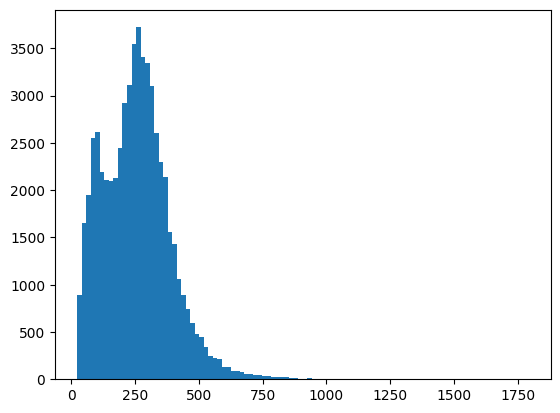

In [21]:
import pandas as pd


df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/wiki-sci-2-w-sentence-context/train_1_60k.csv")
df.fillna("None")

def get_context(text):
    x = text.split(" ### ")
    # remove empty strings
    x = [x for x in x if len(x) > 0]
    
    assert len(x) == 2, f"Unsuccesful prompt splitting . len(x) = {len(x)}, x={x}"
    return x[0]


df['context'] = df['prompt'].apply(lambda x: get_context(x))

def get_prompt(text):
    x = text.split(" ### ")
    # remove empty strings
    x = [x for x in x if len(x) > 0]
    assert len(x) == 2, f"Unsuccesful prompt splitting . len(x) = {len(x)}"
    return x[1]


df['prompt'] = df['prompt'].apply(lambda x: get_prompt(x))

df['context_len'] = df['context'].apply(lambda x: len(x))
df['prompt_len'] = df['prompt'].apply(lambda x: len(x))

df['answers'] = df['A'].astype(str) + "[SEP]" + df['B'].astype(str) + "[SEP]" + df['C'].astype(str) + "[SEP]" + df['D'].astype(str) + "[SEP]" + df['E'].astype(str)
df['answers_len'] = df['answers'].apply(lambda x: len(x))

import matplotlib.pyplot as plt


plt.hist(df['answers_len'], bins=100);

0        HIV can be spread through coughing or sneezing...
1             FAD[SEP]NAD(P)+[SEP]FADH2[SEP]NAD(P)H[SEP]H+
2        It argues for the identity of mental and physi...
3        To provide a unique shape for marketing purpos...
4        Sulfonation of benzene[SEP]Oxidation of anilin...
                               ...                        
59995    Rosie Jimenez Day is a day to advocate for the...
59996    To circulate the fuel around the nozzles befor...
59997    Thallium-201 is used as a fuel for nuclear rea...
59998    Phosphoketolase is only found in the pentose p...
59999    To exploit security issues[SEP]To manipulate h...
Length: 60000, dtype: object

In [6]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/data_dumps/more_questions/more_questions_raw_questions_wiki_sci_2.csv")
df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/cdeotte-60k-data-with-context-v2/all_12_with_context2.csv")

# take 1024 random rows
df = df.sample(1024*4).reset_index(drop=True)

df['A'] = df['A'].fillna("None").astype(str)
df['B'] = df['B'].fillna("None").astype(str)
df['C'] = df['C'].fillna("None").astype(str)
df['D'] = df['D'].fillna("None").astype(str)
df['E'] = df['E'].fillna("None").astype(str)

df['prompt_joined'] = df[['prompt', 'A', 'B', 'C', 'D', 'E']].progress_apply(lambda x: x['prompt'] + " " + x['A'] + " " + x['B'] + " " + x['C'] + " " + x['D'] + " " + x['E'], axis=1)

from sentence_transformers import SentenceTransformer

model_dir = "../data/huggingface_hub_models/bge-large-en"
model = SentenceTransformer(model_dir)


df['embd_prompt'] = df['prompt_joined'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

100%|██████████| 4096/4096 [00:27<00:00, 150.58it/s]


In [7]:
import numpy as np

x = np.stack(df['embd_prompt'].values)

# fill faiss index

import faiss

index = faiss.IndexFlatIP(x.shape[1])
index.add(x)


# find top 10 nearest neighbors of x_example
all_distances = []
duplicate_indices = []
for indx, x_example in tqdm(enumerate(x), total=len(x)):
    D, I = index.search(x_example.reshape(1, -1), 10)
    distances = D[0][1:]
    all_distances.append(distances)
    
    if np.max(distances) > 0.85:
        duplicate_indices.append(indx)
    
    

100%|██████████| 4096/4096 [00:06<00:00, 622.53it/s]


In [8]:
print(len(duplicate_indices) / len(x))

0.279296875


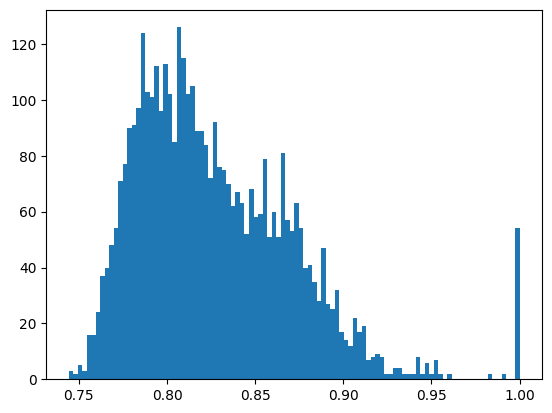

In [9]:
import matplotlib.pyplot as plt

all_distances_max = [np.max(x_el) for x_el in all_distances]
all_distances_all = np.stack(all_distances).flatten()

plt.hist(all_distances_max, bins=100);


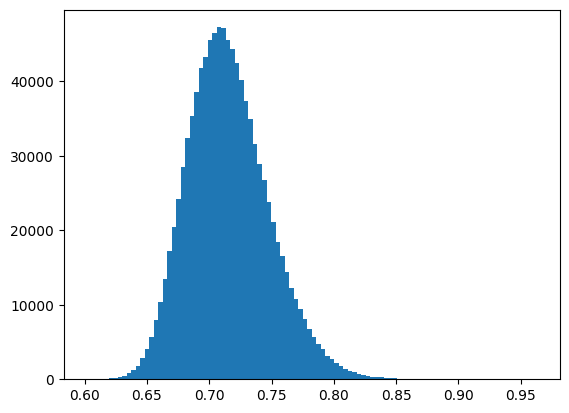

In [73]:
plt.hist(all_distances_all, bins=100);

In [10]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

df = pd.concat([pd.read_parquet(f"/home/viktor/Documents/kaggle/kaggle_llm/data/wikipedia_pages2_w_embd_sentences/wiki_sci_embd_clusters_sentences_{i}.parquet") for i in range(10)], axis=0)

# take 1024 random rows
df = df.sample(1024*8).reset_index(drop=True)

df

,sentences,sentences_embd
0,"An equivalent term is holophyly.\n\nThe word ""...","[0.034699153, -0.013296679, -0.001100601, 0.01..."
1,When a database system begins to recognize an...,"[0.0076812906, -0.012023723, 0.027631044, -0.0..."
2,were awarded the joint contract for design and...,"[0.025755042, 0.01515132, -0.043719266, 0.0157..."
3,The combined spectral type indicates that the...,"[0.018029207, 0.0073426752, 0.007190599, -0.01..."
4,"Once an insert is ligated into a BAC, the BAC ...","[0.007354776, 0.008909068, 0.0043730736, 0.009..."
...,...,...
8187,This disease typically affects males more seve...,"[0.0015897395, 0.0058454694, 0.0005070238, -0...."
8188,Despite these modifications of the outer Layer...,"[0.008357768, 0.008974137, -0.04045779, 0.0184..."
8189,It also fits well with the columns of a truth ...,"[0.01744202, -0.019178115, 0.0099035995, 0.001..."
8190,The problem left is that the computer cannot r...,"[-0.019195378, -0.028201172, -0.007327465, 0.0..."


In [15]:
import numpy as np

x = np.stack(df['sentences_embd'].values)

# fill faiss index

import faiss

index = faiss.IndexFlatIP(x.shape[1])
index.add(x)


# find top 10 nearest neighbors of x_example
all_distances = []
duplicate_indices = []
for indx, x_example in tqdm(enumerate(x), total=len(x)):
    D, I = index.search(x_example.reshape(1, -1), 1000)
    distances = D[0][1:]
    all_distances.append(distances)
    
    if np.max(distances) > 0.85:
        duplicate_indices.append(indx)

  0%|          | 0/8192 [00:00<?, ?it/s]

100%|██████████| 8192/8192 [00:29<00:00, 278.53it/s]


In [16]:
len(duplicate_indices) / len(x)

0.629150390625

In [10]:
import numpy as np
np.arccos(0.85) * 180 / np.pi

31.78833061705162

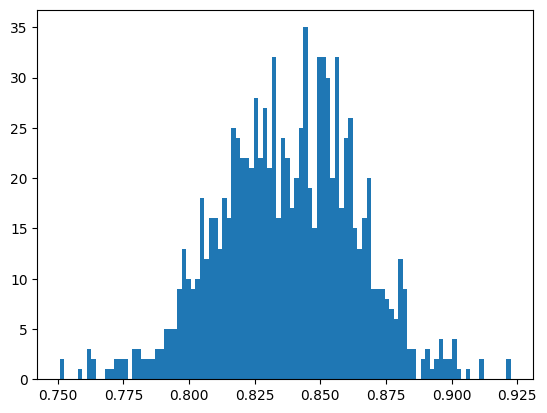

In [4]:
import matplotlib.pyplot as plt

all_distances_max = [np.max(x_el) for x_el in all_distances]
all_distances_all = np.stack(all_distances).flatten()

plt.hist(all_distances_max, bins=100);


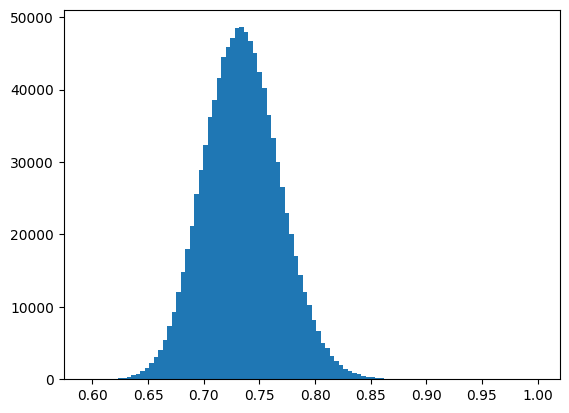

In [79]:
plt.hist(all_distances_all, bins=100);

In [1]:
import pandas as pd


df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/wiki-sci-2-w-sentence-context/test_1.csv")
df

,id,prompt,A,B,C,D,E,answer
0,0,Context: The homogeneously distributed mass of...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D
1,1,"Context: To describe these systems, it is conv...",Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A
2,2,"Context: ""Caput Medusae"" [Latin] means ""Head o...",The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A
3,3,Context: (Another way to avoid the infinity...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C
4,4,"Context: The finer the grating spacing, the gr...",The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D
...,...,...,...,...,...,...,...,...
155,155,Context: Observations of the redshift-distance...,Observations of the redshift-distance relation...,Observations of the redshift-distance relation...,Observations of the redshift-distance relation...,Observations of the redshift-distance relation...,Observations of the redshift-distance relation...,E
156,156,"Context: An Evans balance, also known as a Joh...",The Evans balance is a system used to measure ...,The Evans balance is a system used to measure ...,The Evans balance is a system used to measure ...,The Evans balance is a system used to measure ...,The Evans balance is a system used to measure ...,D
157,157,"Context: For example, the dimension of a point...",The dimension of an object is the number of in...,The dimension of an object is the number of de...,The dimension of an object is the number of in...,The dimension of an object is the number of di...,The dimension of an object is the number of di...,C
158,158,Context: Heavy ion fusion is a fusion energy c...,Accelerator-based light-ion fusion is a techni...,Accelerator-based light-ion fusion is a techni...,Accelerator-based light-ion fusion is a techni...,Accelerator-based light-ion fusion is a techni...,Accelerator-based light-ion fusion is a techni...,A


In [3]:

indx = 53

print(df.iloc[indx]['prompt'][:512])
print("\n")
print("----"*128)
print(df.iloc[indx]['prompt'])
print("\n")
print(len(df.iloc[indx]['prompt']))
print("\n")
print(df.iloc[indx][df.iloc[indx]['answer']])
print("----"*128)
print('A', df.iloc[indx]['A'])
print("----"*128)
print('B', df.iloc[indx]['B'])
print("----"*128)
print('C', df.iloc[indx]['C'])
print("----"*128)
print('D', df.iloc[indx]['D'])
print("----"*128)
print('E', df.iloc[indx]['E'])




Context: In physics, the history of centrifugal and centripetal forces illustrates a long and complex evolution of thought about the nature of forces, relativity, and the nature of physical laws.

Huygens, Leibniz, Newton, and Hooke

Early scientific ideas about centrifugal force were based upon intuitive perception, and circular motion was considered somehow more "natural" than straight-line motion. 

Confusingly, the term has sometimes also been used for the reactive centrifugal force, a real inertial-fra


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------